In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch

In [20]:
from CVAE import *
from helper import OHE

In [21]:
### SETTING OF MODEL/TRAINING PARAMETERS

layer_structure = [784, 300, 50, 10, 2]

# we flatten the MNIST images
input_dim = 784 

# we perform OHE on the numbers (10 in total), and specify the angle of rotation
conditional_vector_dim = 11 

# minibatch size for training
minibatch_size = 256

# no. of epochs for training
n_iter = 50

In [22]:
### DEFINE DATALOADER

train_loader = torch.utils.data.DataLoader(
torchvision.datasets.MNIST('./data/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                (0.1307,), (0.3081,))
                             ])),
batch_size=minibatch_size, shuffle=True)



In [23]:
model = CVAE(torch.tensor(layer_structure), input_dim, conditional_vector_dim)
model.initialise_model()
model.train(n_iter = n_iter, train_loader=train_loader)

In [24]:
# generate and visualise samples: 
## specify the integer to generate, alongside the angle of rotation in [-1, 1] (to be multiplied
## by 45)

examples = enumerate(train_loader)
batch_idx, (example_data, example_targets) = next(examples)


conditional_vector = torch.tensor(OHE(example_targets.numpy()))
normalised_rotation = np.random.uniform(low=-1, high=1, size=(len(conditional_vector), 1))
conditional_vector = torch.concat([conditional_vector, torch.tensor(normalised_rotation)], axis=1)
conditional_vector = conditional_vector.type(torch.float)



example_data = rotate_images(example_data, normalised_rotation)


samples = model.generate_samples(torch.tensor(conditional_vector))
samples = samples.reshape((minibatch_size, 28, 28))


/var/folders/n5/t72v72dd767fqh385sx1j7mm0000gn/T/ipykernel_4985/714744139.py:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  samples = model.generate_samples(torch.tensor(conditional_vector))


tensor(2)
tensor(26.2685)


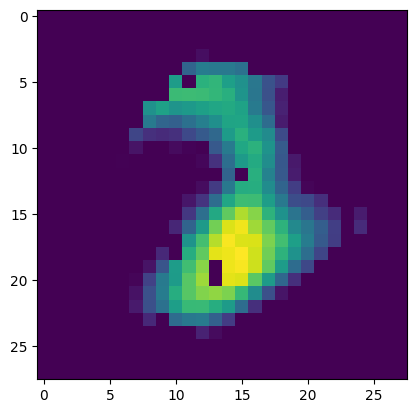

---
tensor(1)
tensor(-42.2288)


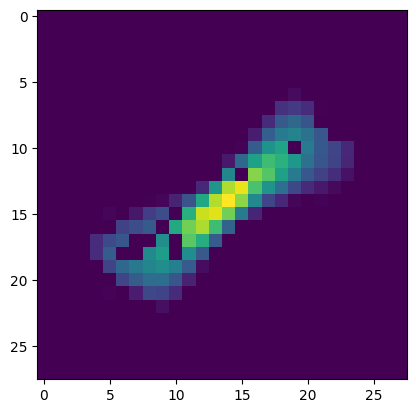

---
tensor(2)
tensor(7.1688)


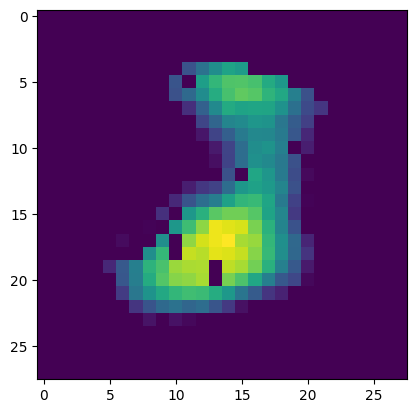

---
tensor(2)
tensor(17.6466)


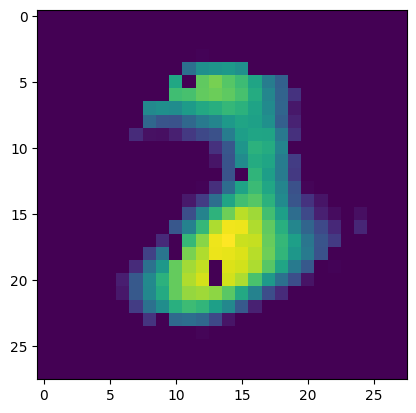

---
tensor(1)
tensor(23.0835)


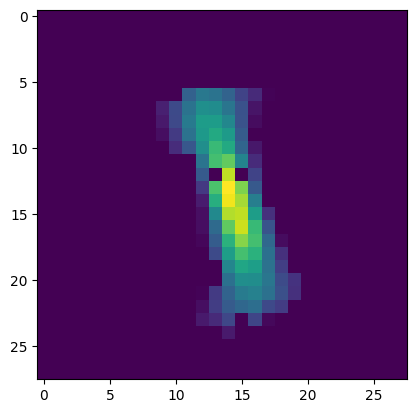

---
tensor(6)
tensor(8.8765)


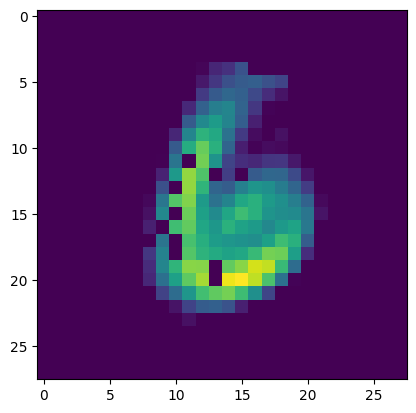

---
tensor(2)
tensor(-21.6044)


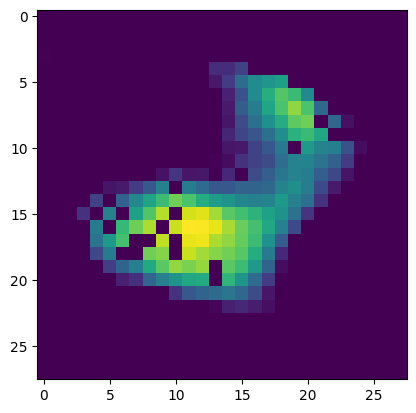

---
tensor(2)
tensor(44.8610)


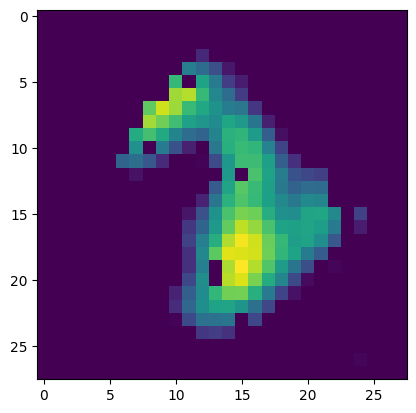

---
tensor(7)
tensor(3.5873)


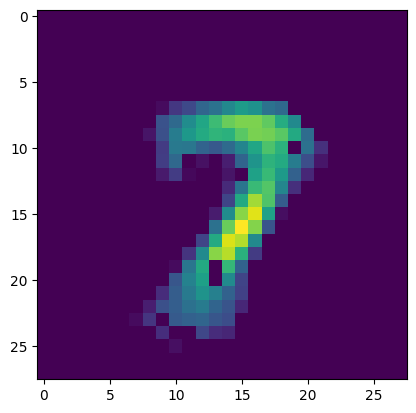

---
tensor(8)
tensor(-16.6087)


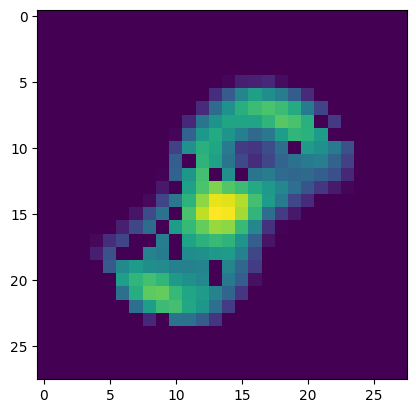

---
tensor(3)
tensor(-23.4399)


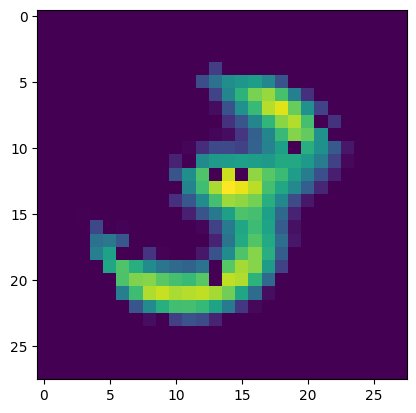

---
tensor(8)
tensor(18.2079)


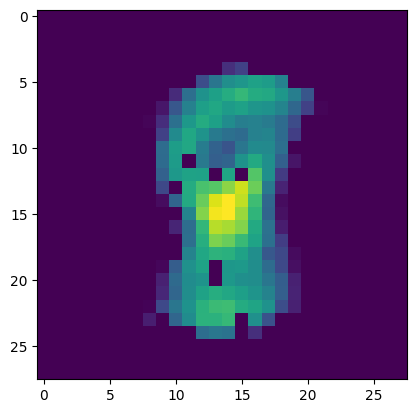

---
tensor(4)
tensor(27.1456)


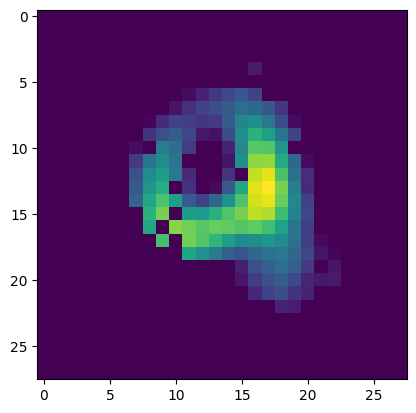

---
tensor(2)
tensor(17.4375)


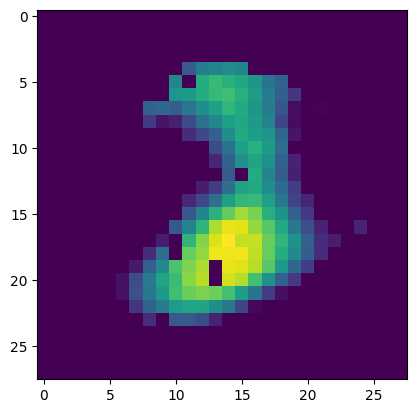

---
tensor(1)
tensor(43.1937)


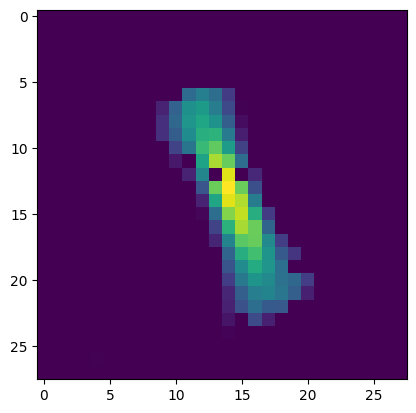

---
tensor(6)
tensor(21.4834)


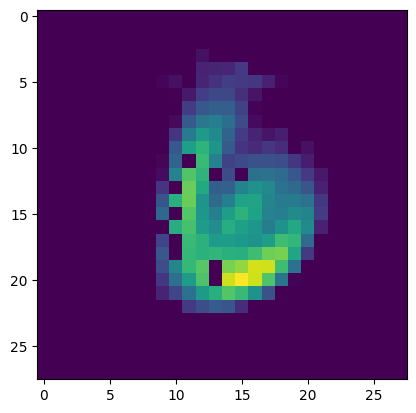

---
tensor(3)
tensor(38.4169)


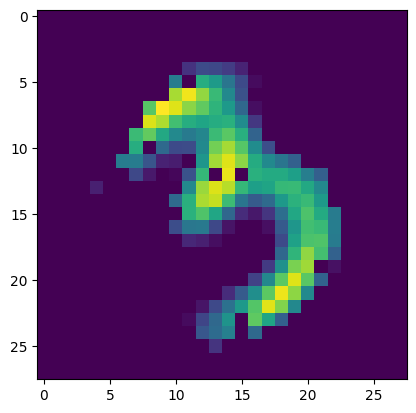

---
tensor(7)
tensor(20.1012)


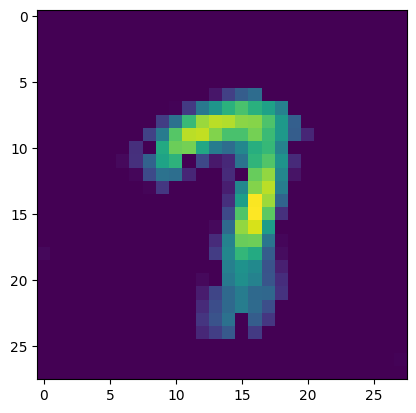

---
tensor(9)
tensor(-20.0577)


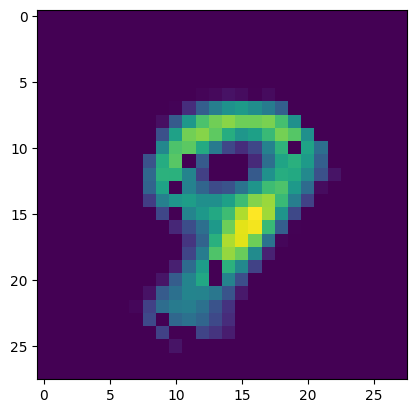

---
tensor(8)
tensor(14.0405)


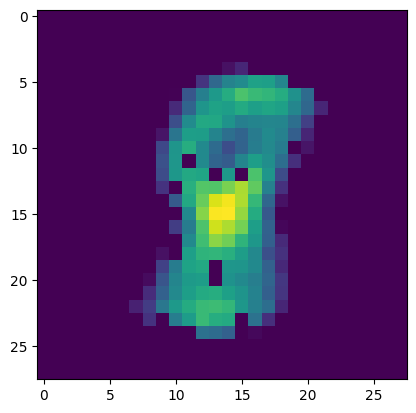

---
tensor(1)
tensor(16.5518)


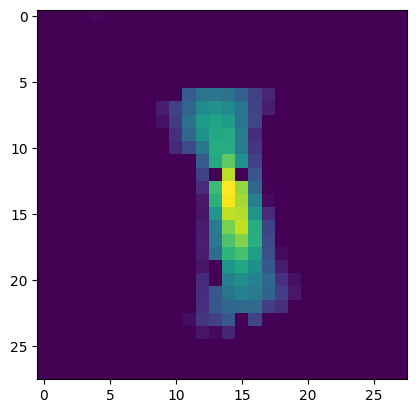

---
tensor(2)
tensor(11.9108)


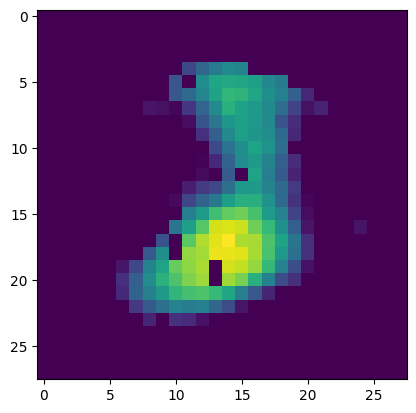

---
tensor(6)
tensor(-13.1884)


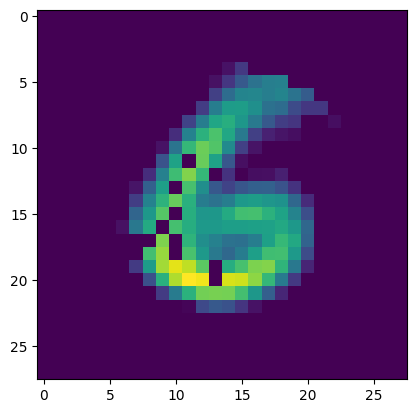

---
tensor(2)
tensor(-21.5718)


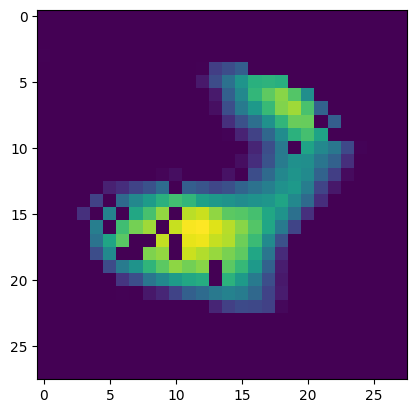

---
tensor(8)
tensor(-8.7796)


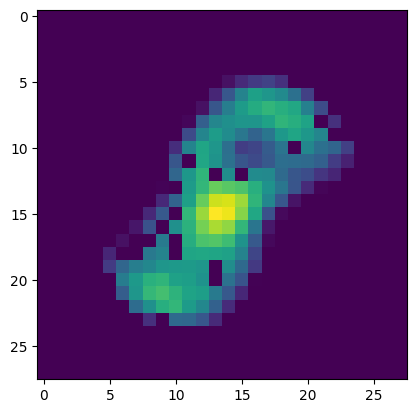

---
tensor(9)
tensor(11.4186)


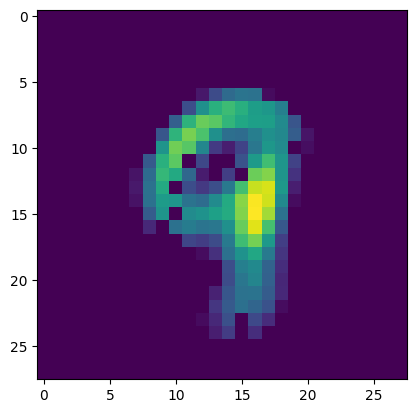

---
tensor(3)
tensor(-13.3857)


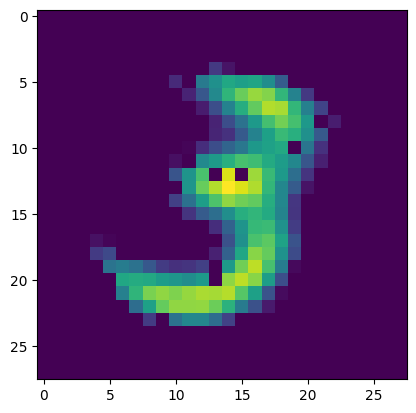

---
tensor(5)
tensor(-28.2986)


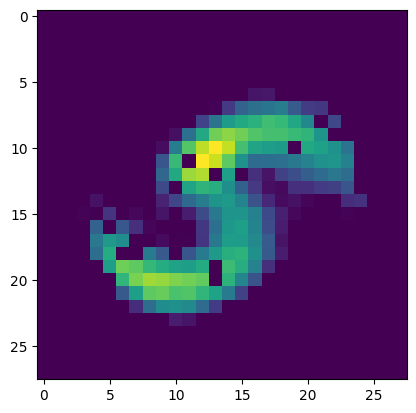

---
tensor(7)
tensor(-28.7761)


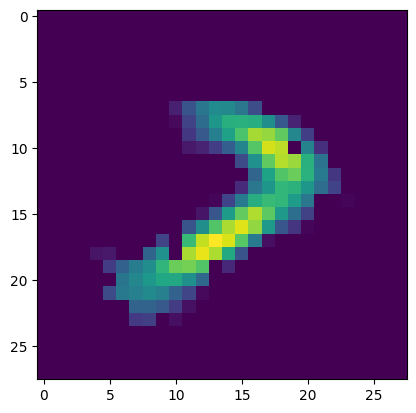

---
tensor(8)
tensor(-38.3075)


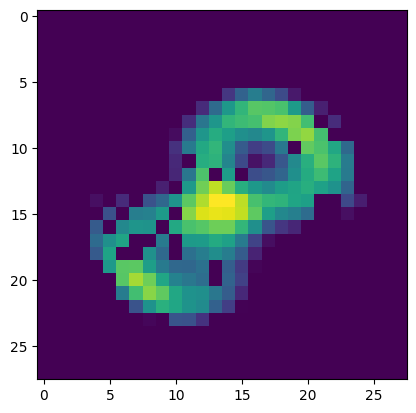

---


In [32]:
# visualise random samples, and print the angle of rotation we want

for i in range(30):
    print(example_targets[i])
    print(conditional_vector[i][-1]*45)
    plt.imshow(samples[i].detach().numpy())
    plt.show()
    print('---')

In [28]:
####################################################


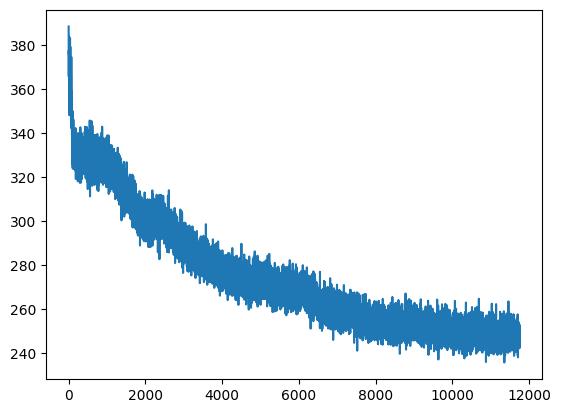

In [31]:
plt.plot(model.batch_loss)